<a href="https://colab.research.google.com/github/Guyodub/Africa_Crises/blob/main/Model_building_Research_Objective_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fake News Data 

Fake news is a new phenomena that has taken the world by surprise. It's negative ramifications is felt now more than ever especially accelerated by growth of social media usage.

This notebook is motivated by my Msc. Thesis. I am working on 'EXPLAINABLE DEEP LEARNING MODEL FOR FAKE NEWS CLASSIFICATION: A CASE STUDY OF FAKE NEWS DATA IN KENYA'.

The main objective: To build an explainable hybrid model that can produce better accuracy and has ability for early fake news detection with explainable factors.

The Specific objectives of my research is three-folds;

**1. To build a prediction model based on a hybrid deep learning approach.**
2. To explain model predictions in order to improve public trust.
3. To conduct experiments to evaluate model prediction and interpretability.


This notebook implements objective 1 above and its aims are;

a. To compare different machine learning models while applying different tokenization technique on Fake News data.

b. To compare different machine learning models while applying different vectorization approaches on Fake News data.

c. To obtain a hybrid model that can produce the best performance


Load libraries

In [ ]:
import numpy as np

import pandas as pd

##Packages for preprocessing
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

##Packages for vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from keras.preprocessing.text import Tokenizer
#Plotting package
import matplotlib.pyplot as plt
#package for models
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import itertools
#Packages for passiveAggressiveClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
#Logistics regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

#Packages for embeddings
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

# Visualization using Matplotlib, Seaborn, Plotly
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns
sns.set_style('white')

import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Read data sets

In [ ]:
# !pip install PyDrive

In [ ]:
# !pip install -U -q PyDrive

Prepare Colab to read csv from google drive

In [ ]:
 # Code to read csv file into Colaboratory:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1GkmZuIFg1ZtWyamHS5AgUZ9iIrulPWIf/view?usp=sharing' 

In [ ]:
id ='1GkmZuIFg1ZtWyamHS5AgUZ9iIrulPWIf'

In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train.csv')  

#Data source

https://www.kaggle.com/c/fake-news/data

Read data sets

In [ ]:
df= pd.read_csv('train.csv')

In [ ]:
df.shape

(20800, 5)

In [ ]:
df.head(-5)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20790,20790,Nikki Haley Blasts U.N. Human Rights Office fo...,Adam Shaw,U. S Ambassador to the United Nations Nikki Ha...,0
20791,20791,Lawyer Who Kept Hillary Campaign Chief Out of ...,Daniel Greenfield,Lawyer Who Kept Hillary Campaign Chief Out of ...,1
20792,20792,"Jakarta Bombing Kills Three Police Officers, L...",John Hayward,Two suicide bombers attacked a bus station in ...,0
20793,20793,Idiot Who Destroyed Trump Hollywood Star Gets ...,Robert Rich,Share This \nAlthough the vandal who thought i...,1


#Text preprocessing

Remove stopwords, do stemming, convert upper case to lower case, remove special characters and digits

In [ ]:
#Initialize the PorterStemmer()
ps = PorterStemmer()
#Loop through the corpus to substitute non-characters, convert text to lowercase,
#split the text and remove the stopowords
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', str(df['title'][i])) #substitute non-characters
    review = review.lower() #convert to lower case
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')] #remove stopwords
    review = ' '.join(review)
    corpus.append(review)
#Check text in index 3 in corpus
corpus[3]

'civilian kill singl us airstrik identifi'

In [ ]:
len(corpus)

20800

In [ ]:
y=df['label']
type(y)

pandas.core.series.Series

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(corpus, y, test_size=0.33, random_state=0)

In [ ]:
# len(X_train), len(X_test), y_train.shape, y_test.shape

#Applying CountVectorizer


#1: Creating the Bag of Words model

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer(max_features=5000, ngram_range=(1,3))
# X = cv.fit_transform(corpus).toarray()
# y=df['label']
# #divide the data into test and train
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
# X_train[0:2]

In [ ]:
# def get_top_ngram(corpus, n=None):
#     vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
#     bag_of_words = vec.transform(corpus)
#     sum_words = bag_of_words.sum(axis=0) 
#     words_freq = [(word, sum_words[0, idx]) 
#                   for word, idx in vec.vocabulary_.items()]
#     words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#     return words_freq[:10]

## 2. Applying tfidf

In [ ]:
# ## TFidf Vectorizer
# y2=df['label']
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
# X2=tfidf_v.fit_transform(corpus).toarray()
# ## Divide the dataset into Train and Test
# from sklearn.model_selection import train_test_split
# X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state=0)
# tfidf_v.get_feature_names()[:20]
# tfidf_v.get_params()
# count_df2 = pd.DataFrame(X2_train, columns=tfidf_v.get_feature_names())
# count_df2.head()

## Applying Word embedding - Word2Vec

In [ ]:
# from gensim.models import Word2Vec

# word2vec = Word2Vec(corpus, min_count=2)

In [ ]:
# vocabulary = word2vec.wv.vocab
# print(vocabulary)

#Customized code for Confusion Matrix

In [ ]:
# def plot_confusion_matrix(cm, classes,
#                           normalize=False,
#                           title='Confusion matrix',
#                           cmap=plt.cm.Blues):
#     """
#     See full source and example: 
#     http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
#     This function prints and plots the confusion matrix.
#     Normalization can be applied by setting `normalize=True`.
#     """
#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)

#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, cm[i, j],
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

#     plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')

# Machine learning models with bag of words

## 1):Multinomial Naive Bayes

With BOW

In [ ]:
# #Initialize the multinomialNB classifier
# classifier = MultinomialNB()
# #Fit the classifier
# classifier.fit(X_train, y_train)
# #Predict for the X_test
# predNB1 = classifier.predict(X_test)
# #obtain the accuracy
# accuracy = accuracy_score(y_test, predNB1 )
# #obtain the precision
# precision = precision_score(y_test, predNB1 , average='weighted')
# #obtain the recall
# recall = recall_score(y_test, predNB1 , average='weighted')
# #obtain the f1
# f1 = f1_score(y_test, predNB1 , average='weighted')
# #Print accuracy, precision, recall and f1
# print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

In [ ]:
# #compute the confusion matrix
# cm=metrics.confusion_matrix(y_test, predNB1)
# #plot the confusion matrix
# plot_confusion_matrix(cm, classes=['FAKE DATA', 'REAL DATA'])

In [ ]:
# #Initialize the multinomialNB classifier
# classifier2NB=MultinomialNB()
# #Fit the classifier
# classifier2NB.fit(X2_train,y2_train)
# predNB2=classifier2NB.predict(X2_test)
# #obtain the accuracy
# accuracy = accuracy_score(y_test, predNB2)
# #obtain the precision
# precision = precision_score(y_test, predNB2 , average='weighted')
# #obtain the recall
# recall = recall_score(y_test, predNB2 , average='weighted')
# #obtain the f1
# f1 = f1_score(y_test, predNB2 , average='weighted')
# #Print accuracy, precision, recall and f1
# print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

In [ ]:
# #compute the confusion matrix
# cm=metrics.confusion_matrix(y_test, predNB2)
# #plot the confusion matrix
# plot_confusion_matrix(cm, classes=['FAKE DATA', 'REAL DATA'])

## Multinomial Classifier with Hyperparameter

In [ ]:
# classifier=MultinomialNB(alpha=0.1)

In [ ]:
# previous_score=0
# for alpha in np.arange(0,1,0.1):
#     sub_classifier=MultinomialNB(alpha=alpha)
#     sub_classifier.fit(X_train,y_train)
#     y_pred=sub_classifier.predict(X_test)
#     score = metrics.accuracy_score(y_test, y_pred)
#     if score>previous_score:
#         classifier=sub_classifier
#     print("Alpha: {}, Score : {}".format(alpha,score))

In [ ]:
# #Check the feature names
# feature_names = cv.get_feature_names()
# #check the coefficient
# classifier.coef_[0]

In [ ]:
# ## Obtain the  Most real words
# sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:10]

In [ ]:
# ### Obtain the Most fake words
# sorted(zip(classifier.coef_[0], feature_names))[:10]

## Model 2

## 2) Passive Aggressive Classifier **Algorithm**

With BOW

In [ ]:
# #Initialize the PassiveAggressiveClassifier
# linear_clf1 = PassiveAggressiveClassifier()
# #Fit the PassiveAggressiveClassifier
# linear_clf1.fit(X_train, y_train)
# #Predict using the test set
# pred_pass1  = linear_clf1.predict(X_test)
# #obtain the accuracy
# accuracy = accuracy_score(y_test, pred_pass1 )
# #obtain the precision
# precision = precision_score(y_test, pred_pass1 , average='weighted')
# #obtain the recall
# recall = recall_score(y_test, pred_pass1 , average='weighted')
# #obtain the f1
# f1 = f1_score(y_test, pred_pass1 , average='weighted')
# #Print accuracy, precision, recall and f1
# print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

In [ ]:
# #compute the confusion matrix
# cm=metrics.confusion_matrix(y_test, pred_pass1)
# #plot the confusion matrix
# plot_confusion_matrix(cm, classes=['FAKE DATA', 'REAL DATA'])

With TD-IDF

In [ ]:
# #Initialize the PassiveAggressiveClassifier
# linear_clf2 = PassiveAggressiveClassifier()
# #Fit the PassiveAggressiveClassifier
# linear_clf2.fit(X2_train, y2_train)
# #Predict using the test set
# pred_pass2  = linear_clf2.predict(X2_test)
# #obtain the accuracy
# accuracy = accuracy_score(y_test, pred_pass2 )
# #obtain the precision
# precision = precision_score(y_test, pred_pass2 , average='weighted')
# #obtain the recall
# recall = recall_score(y_test, pred_pass2 , average='weighted')
# #obtain the f1
# f1 = f1_score(y_test, pred_pass2 , average='weighted')
# #Print accuracy, precision, recall and f1
# print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

In [ ]:
# #compute the confusion matrix
# cm=metrics.confusion_matrix(y_test, pred_pass2)
# #plot the confusion matrix
# plot_confusion_matrix(cm, classes=['FAKE DATA', 'REAL DATA'])

## Model 3

# 3. Logistics Regression

With BOW

In [ ]:
# logreg = LogisticRegression()
# logreg.fit(X_train, y_train)
# pred = logreg.predict(X_test)
# accuracy = accuracy_score(y_test, pred)
# precision = precision_score(y_test, pred, average='weighted')
# recall = recall_score(y_test, pred, average='weighted')
# f1 = f1_score(y_test, pred, average='weighted')
# print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

In [ ]:
# #compute the confusion matrix
# cm=metrics.confusion_matrix(y_test, pred)
# #plot the confusion matrix
# plot_confusion_matrix(cm, classes=['FAKE DATA', 'REAL DATA'])

With TF-IDF

In [ ]:
# logreg = LogisticRegression()
# logreg.fit(X2_train, y2_train)
# pred2 = logreg.predict(X2_test)
# accuracy2 = accuracy_score(y2_test, pred2)
# precision2 = precision_score(y_test, pred2, average='weighted')
# recall2 = recall_score(y2_test, pred2, average='weighted')
# f12 = f1_score(y_test, pred, average='weighted')
# print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy2, precision2, recall2, f12))

In [ ]:
# #compute the confusion matrix
# cm2=metrics.confusion_matrix(y_test, pred2)
# #plot the confusion matrix
# plot_confusion_matrix(cm2, classes=['FAKE DATA', 'REAL DATA'])

## 4. Support Vector Machine (SVM)

With BOW

In [ ]:
# from sklearn import svm
# # Classifier - Algorithm - SVM
# # fit the training dataset on the classifier
# SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
# SVM.fit(X_train, y_train)
# # predict the labels on validation dataset
# predictions_SVM = SVM.predict(X_test)
# # Use accuracy_score function to get the accuracy
# accuracy = accuracy_score(y_test, predictions_SVM)
# precision = precision_score(y_test, predictions_SVM, average='weighted')
# recall = recall_score(y_test, predictions_SVM, average='weighted')
# f1 = f1_score(y_test, predictions_SVM, average='weighted')
# print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

In [ ]:
# #compute the confusion matrix
# cm=metrics.confusion_matrix(y_test, predictions_SVM)
# #plot the confusion matrix
# plot_confusion_matrix(cm, classes=['FAKE DATA', 'REAL DATA'])

With TF-IDF

In [ ]:
# # Classifier - Algorithm - SVM
# SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
# # fit the training dataset on the classifier
# SVM.fit(X2_train, y2_train)
# # predict the labels on validation dataset
# predictions_SVM2 = SVM.predict(X2_test)
# # Use accuracy_score function to get the accuracy
# accuracy2 = accuracy_score(y2_test, predictions_SVM2)
# precision2 = precision_score(y2_test, predictions_SVM2, average='weighted')
# recall2 = recall_score(y2_test, predictions_SVM2, average='weighted')
# f12 = f1_score(y2_test, predictions_SVM2, average='weighted')
# print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy2, precision2, recall2, f12))

In [ ]:
# #compute the confusion matrix
# cm2=metrics.confusion_matrix(y_test, predictions_SVM2)
# #plot the confusion matrix
# plot_confusion_matrix(cm2, classes=['FAKE DATA', 'REAL DATA'])

## 5. Random Forest

With BOW

In [ ]:
# from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,ExtraTreesClassifier
# from sklearn.tree import DecisionTreeClassifier
# rf = RandomForestClassifier(random_state=42)
# rf.fit(X_train,y_train)

In [ ]:
# print("Train Score on BOW: ", round(rf.score(X_test,y_test),4))

With TF-IDF

In [ ]:
# rf2 = RandomForestClassifier(random_state=42)
# rf2.fit(X2_train ,y2_train)

In [ ]:
# print("Train Score on TF-IDF: ", round(rf.score(X2_test,y2_test),4))

## 6. Gradient Boosting classifier

With BOW

In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier
# # Create a classifier
# gdf_classifier = MultinomialNB() 
# gdf_classifier=GradientBoostingClassifier(learning_rate = 0.1,
#                                      max_depth = 3,
#                                      min_samples_leaf = 5,
#                                      min_samples_split = 4,
#                                      n_estimators = 100,
#                                      random_state=42)

In [ ]:
# gdf_classifier.fit(X_train,y_train)

In [ ]:
# predictions_gdf = gdf_classifier.predict(X_test)
# # Use accuracy_score function to get the accuracy
# accuracy = accuracy_score(y_test, predictions_gdf)
# precision = precision_score(y_test, predictions_gdf, average='weighted')
# recall = recall_score(y_test, predictions_gdf, average='weighted')
# f1 = f1_score(y_test, predictions_gdf, average='weighted')
# print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

With TF-IDF

In [ ]:
# gdf_classifier2 = MultinomialNB() 
# gdf_classifier2=GradientBoostingClassifier(learning_rate = 0.1,
#                                      max_depth = 3,
#                                      min_samples_leaf = 5,
#                                      min_samples_split = 4,
#                                      n_estimators = 100,
#                                      random_state=42)

In [ ]:
# gdf_classifier2.fit(X_train,y_train)

In [ ]:
# predictions_gdf2 = gdf_classifier2.predict(X_test)
# # Use accuracy_score function to get the accuracy
# accuracy2 = accuracy_score(y2_test, predictions_gdf2)
# precision2 = precision_score(y2_test, predictions_gdf2, average='weighted')
# recall2 = recall_score(y2_test, predictions_gdf2, average='weighted')
# f12 = f1_score(y2_test, predictions_gdf2, average='weighted')
# print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy2, precision2, recall2, f12))

## 7. Xgboost

With BOW

In [ ]:
# import xgboost as xgb
# # Create a classifier
# xg_classifier = xgb.XGBClassifier(max_depth=10, n_estimators=80, learning_rate=0.11, colsample_bytree=.7, 
#                                                  gamma=.01, reg_alpha=4)

In [ ]:
# # # train the news_classifier 
# xg_classifier.fit(X_train,y_train)

In [ ]:
# predictions_xgb = xg_classifier.predict(X_test)
# # Use accuracy_score function to get the accuracy
# accuracy = accuracy_score(y_test, predictions_xgb)
# precision = precision_score(y_test, predictions_xgb, average='weighted')
# recall = recall_score(y_test, predictions_xgb, average='weighted')
# f1 = f1_score(y_test, predictions_xgb, average='weighted')
# print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

With TF-IDF

In [ ]:
# import xgboost as xgb
# xg2_classifier = xgb.XGBClassifier(max_depth=10, n_estimators=80, learning_rate=0.11, colsample_bytree=.7, 
#                                                  gamma=.01, reg_alpha=4)

In [ ]:
# xg2_classifier.fit(X2_train,y2_train)

In [ ]:
# predictions_xgb2 = xg2_classifier.predict(X_test)
# # Use accuracy_score function to get the accuracy
# accuracy2 = accuracy_score(y2_test, predictions_xgb2)
# precision2 = precision_score(y2_test, predictions_xgb2, average='weighted')
# recall2 = recall_score(y2_test, predictions_xgb2, average='weighted')
# f12 = f1_score(y2_test, predictions_xgb2, average='weighted')
# print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy2, precision2, recall2, f12))

## 8. Deep Artificial Neural Network

With TF-IDF

With one-hot encoding

In [ ]:
# from tensorflow.keras.layers import Embedding
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.preprocessing.text import one_hot
# ### Vocabulary size
# voc_size=5000
# #one  hot representation

# onehot_repr=[one_hot(words,voc_size)for words in corpus] 
# #Panding
# sent_length=20
# embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
# print(embedded_docs)

In [ ]:
# import numpy as np
# X_final=np.array(embedded_docs)
# y_final=np.array(y)
# #splitting
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [ ]:
# from keras.models import Sequential
# from keras import layers

# input_dim = X_train.shape[1]  # Number of features

# model = Sequential()
# model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
# model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
# model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
# model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.summary()

In [ ]:
# model.fit(X_train, y_train,epochs=10,verbose=False,validation_data=(X_test, y_test), batch_size=10)

In [ ]:
# #performance metrics and accuracy
# y_pred=model.predict_classes(X_test)

In [ ]:
# from sklearn.metrics import confusion_matrix
# confusion_matrix(y_test,y_pred)

In [ ]:
# from sklearn.metrics import accuracy_score
# accuracy_score(y_test,y_pred)

In [ ]:
# from keras.backend import clear_session
# clear_session()

With word2vec

## 9. LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation, BatchNormalization

# Evaluation metrics
from sklearn.metrics import accuracy_score, make_scorer, confusion_matrix, classification_report, log_loss, auc, roc_auc_score, roc_curve, f1_score, precision_recall_curve, recall_score, precision_score


 TF-IDF

In [ ]:
%time

#libraries
import nltk
nltk.download('punkt')
import random
# Splitting data into train, test & validation sets
from sklearn.model_selection import train_test_split
seed=42
x_train, x_val_test, y_train, y_val_test = train_test_split(corpus, y, test_size=.4, stratify=y, random_state=seed)

x_val, x_test, y_val, y_test = train_test_split(
    x_val_test, y_val_test, test_size=.6, stratify=y_val_test, random_state=seed)


# tf-idf vectorizer for sentence/topic/document modelling
max_features=5000
tvec = TfidfVectorizer(max_features=max_features, ngram_range=(1, 3), max_df=0.65,
                       tokenizer=nltk.word_tokenize,
                       strip_accents='unicode',
                       lowercase=True, analyzer='word', token_pattern=r'\w+',
                       use_idf=True, smooth_idf=True, sublinear_tf=False,
                       stop_words=stopwords.words('english'))


# Fit & Transform on train texts
# Only transform on val & test texts

x_train_tf = tvec.fit_transform(x_train).toarray()
x_val_tf = tvec.transform(x_val).toarray()
x_test_tf = tvec.transform(x_test).toarray()

# Printing the shape of different text corpus

print('\nx_train_tf shape: ', x_train_tf.shape)
print('x_val_tf: ', x_val_tf.shape)
print('x_test_tf: ', x_test_tf.shape)

# Reshape data to [samples, time steps, features] shape

print(
    '\nReshaping data to the shape [samples, time steps, features] for LSTMs ...')
x_train_tf_lstm = np.reshape(
    x_train_tf, (x_train_tf.shape[0], 1, x_train_tf.shape[1]))
x_val_tf_lstm = np.reshape(x_val_tf, (x_val_tf.shape[0], 1, x_val_tf.shape[1]))
x_test_tf_lstm = np.reshape(
    x_test_tf, (x_test_tf.shape[0], 1, x_test_tf.shape[1]))
print('\nReshaping done ...')

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.




x_train_tf shape:  (12480, 5000)
x_val_tf:  (3328, 5000)
x_test_tf:  (4992, 5000)

Reshaping data to the shape [samples, time steps, features] for LSTMs ...

Reshaping done ...


Training

Basic LSTM With TF-IDF

In [ ]:
#libraries
np.random.seed(seed)

# Create Model

model = Sequential()

model.add(LSTM(512, input_shape=(1, max_features),
               dropout=0.2, recurrent_dropout=0.2))
model.add(BatchNormalization())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

# Compile Model

model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])
print(model.summary())



# Fit the model with shuffled data

# model.fit_generator(generator=batch_generator_shuffle(x_train_tf, y_train, batch_size),
#                     validation_data=(x_val_tf, y_val), epochs=50, steps_per_epoch=x_train_tf.shape[0]/batch_size,
#                     verbose=2, callbacks=callbacks_list, shuffle=True, initial_epoch=0,
#                     use_multiprocessing=True)
batch_size=64
epochs=10
model.fit(x_train_tf_lstm, y_train, validation_data=(x_val_tf_lstm, y_val), batch_size=batch_size,
          epochs=epochs, verbose=2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 512)               11290624  
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32832     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                2

Evaluation

In [ ]:
# Evaluation gives the result from the last trained model

model.evaluate(x=x_test_tf_lstm, y=y_test)

156/156 [==============================] - 1s 5ms/step - loss: 0.2696 - accuracy: 0.9287


[0.2695559859275818, 0.9286859035491943]

Confusion Matrix and F1 Score

LSTM basic cells Scores

F1 score 92.97%
Accuracy score 92.87%


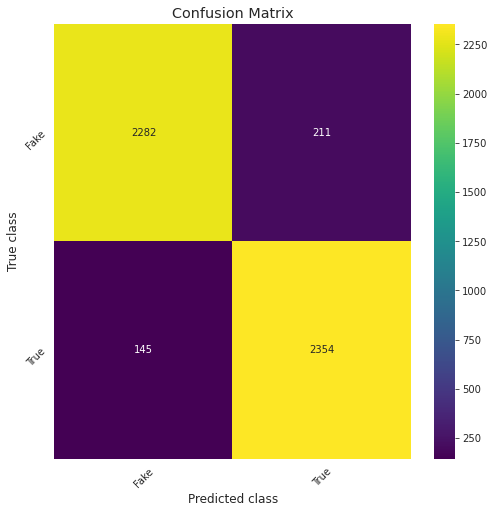

In [ ]:
# Evaluation gives the result from the last trained model

y_pred = model.predict(x=x_test_tf_lstm)
y_pred = [np.round(value) for value in y_pred]

print('LSTM basic cells Scores\n')
print("F1 score {:.4}%".format(f1_score(y_test, y_pred)*100))
print('Accuracy score {:.4}%'.format(accuracy_score(y_test, y_pred)*100))


con_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap

fig, ax = plt.subplots(1, figsize=(8, 8))
import seaborn as sns
ax = sns.heatmap(con_matrix, ax=ax, cmap='viridis', annot=True, fmt='g')
xticklabels=['Fake', 'True']
ax.set_xticklabels(xticklabels, rotation=45)
ax.set_yticklabels(xticklabels, rotation=45)

plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion Matrix')

# fig.savefig(os.path.join('./save/con_matrix',
#                          'FakeNews_LSTM_Confusion_Matrix.png'), dpi=300)
plt.show()

Bi-Directional LSTM with TF-IDF

Basic LSTM With embedding one-hot encoding

In [ ]:
### Vocabulary size
voc_size=5000
#one  hot representation
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
#Panding
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 3075 2403 1597]
 [   0    0    0 ...  830 4921 2212]
 [   0    0    0 ... 2776 4280  239]
 ...
 [   0    0    0 ...    4 4346 4988]
 [   0    0    0 ... 1171 3386 2380]
 [   0    0    0 ... 2207  343 1794]]


In [ ]:
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               56400     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)
#splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [ ]:
#model training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
218/218 [==============================] - 33s 15ms/step - loss: 0.4508 - accuracy: 0.7868 - val_loss: 0.1936 - val_accuracy: 0.9254
Epoch 2/10
218/218 [==============================] - 3s 14ms/step - loss: 0.1310 - accuracy: 0.9482 - val_loss: 0.1937 - val_accuracy: 0.9253
Epoch 3/10
218/218 [==============================] - 3s 14ms/step - loss: 0.0865 - accuracy: 0.9701 - val_loss: 0.2124 - val_accuracy: 0.9240
Epoch 4/10
218/218 [==============================] - 3s 15ms/step - loss: 0.0620 - accuracy: 0.9796 - val_loss: 0.2754 - val_accuracy: 0.9257
Epoch 5/10
218/218 [==============================] - 3s 15ms/step - loss: 0.0552 - accuracy: 0.9828 - val_loss: 0.2697 - val_accuracy: 0.9155
Epoch 6/10
218/218 [==============================] - 3s 15ms/step - loss: 0.0381 - accuracy: 0.9877 - val_loss: 0.3299 - val_accuracy: 0.9123
Epoch 7/10
218/218 [==============================] - 4s 16ms/step - loss: 0.0193 - accuracy: 0.9944 - val_loss: 0.3236 - val_accuracy: 0.917

In [ ]:
#adding dropout
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(300))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#model training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
218/218 [==============================] - 5s 17ms/step - loss: 0.4445 - accuracy: 0.7876 - val_loss: 0.2089 - val_accuracy: 0.9189
Epoch 2/10
218/218 [==============================] - 3s 16ms/step - loss: 0.1282 - accuracy: 0.9496 - val_loss: 0.1913 - val_accuracy: 0.9289
Epoch 3/10
218/218 [==============================] - 2s 10ms/step - loss: 0.0988 - accuracy: 0.9655 - val_loss: 0.2143 - val_accuracy: 0.9172
Epoch 4/10
218/218 [==============================] - 3s 15ms/step - loss: 0.0692 - accuracy: 0.9768 - val_loss: 0.2331 - val_accuracy: 0.9261
Epoch 5/10
218/218 [==============================] - 3s 16ms/step - loss: 0.0454 - accuracy: 0.9850 - val_loss: 0.2544 - val_accuracy: 0.9237
Epoch 6/10
218/218 [==============================] - 3s 16ms/step - loss: 0.0372 - accuracy: 0.9872 - val_loss: 0.2700 - val_accuracy: 0.9245
Epoch 7/10
218/218 [==============================] - 3s 15ms/step - loss: 0.0373 - accuracy: 0.9887 - val_loss: 0.3234 - val_accuracy: 0.9205

In [ ]:
#performance metrics and accuracy
y_pred=model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[3173,  276],
       [ 330, 3085]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9117132867132867

Basic LSTM with Word2vec word embedding

In [ ]:
from gensim.models import Word2Vec

In [ ]:
import gensim.models.keyedvectors as word2vec 

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2021-03-29 12:44:09--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-03-29 12:44:09--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-03-29 12:44:09--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

glove

In [ ]:
!wget https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz 

--2021-03-29 12:46:50--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.96.21
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.96.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  40.2MB/s    in 49s     

2021-03-29 12:47:40 (31.8 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [ ]:
!gunzip GoogleNews-vectors-negative300.bin 

gzip: GoogleNews-vectors-negative300.bin: unknown suffix -- ignored


In [ ]:
!ls
!pwd

adc.json	GoogleNews-vectors-negative300.bin     train.csv
glove.6B.zip	GoogleNews-vectors-negative300.bin.gz
glove.6B.zip.1	sample_data
/content


In [ ]:
""" Load and index the GoogleNews word2vec file """
from gensim.models import KeyedVectors

EMBEDDING_FILE = 'GoogleNews-vectors-negative300.bin'

print('Indexing word vectors')
word2vec = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)
print('Found %s word vectors of word2vec' % len(word2vec.vocab))

Indexing word vectors
Found 3000000 word vectors of word2vec


In [ ]:
#Use pretrained Word2Vec model from google but trim the word list to 50,0000 compared to 300,000 in the original Google pretrained model

import gensim.models.keyedvectors as word2vec #
w2vModel = word2vec.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True, limit=50000)

In [ ]:
#Convert words to integers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
X = tokenizer.texts_to_sequences(corpus)

#lenght of tweet to consider
maxlentweet = 40
#add padding
X = pad_sequences(X, maxlen=maxlentweet)
print(X.shape)

(20800, 40)


In [ ]:
#create a embedding layer using Google pre triained word2vec (50000 words)
embedding_layer = Embedding(input_dim=w2vModel.syn0.shape[0], output_dim=w2vModel.syn0.shape[1], weights=[w2vModel.syn0], 
                            input_length=X.shape[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).



In [ ]:
lstm_out = 80

model = Sequential()
model.add(embedding_layer)
model.add(LSTM(units=lstm_out))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 40, 300)           15000000  
_________________________________________________________________
lstm_3 (LSTM)                (None, 80)                121920    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 81        
Total params: 15,122,001
Trainable params: 15,122,001
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size= 0.1, random_state = 24)

In [ ]:
#fit model
batch_size = 32
model.fit(X_train, Y_train, epochs=10, verbose=1, batch_size=batch_size)

Epoch 1/10
585/585 [==============================] - 85s 144ms/step - loss: 0.2844 - accuracy: 0.8697
Epoch 2/10
585/585 [==============================] - 84s 144ms/step - loss: 0.0783 - accuracy: 0.9716
Epoch 3/10
585/585 [==============================] - 84s 143ms/step - loss: 0.0275 - accuracy: 0.9918
Epoch 4/10
585/585 [==============================] - 84s 144ms/step - loss: 0.0087 - accuracy: 0.9977
Epoch 5/10
585/585 [==============================] - 84s 144ms/step - loss: 0.0051 - accuracy: 0.9982
Epoch 6/10
585/585 [==============================] - 84s 143ms/step - loss: 0.0027 - accuracy: 0.9992
Epoch 7/10
585/585 [==============================] - 84s 143ms/step - loss: 0.0053 - accuracy: 0.9979
Epoch 8/10
585/585 [==============================] - 84s 143ms/step - loss: 0.0019 - accuracy: 0.9991
Epoch 9/10
585/585 [==============================] - 84s 143ms/step - loss: 0.0012 - accuracy: 0.9995
Epoch 10/10
585/585 [==============================] - 83s 143ms/step - l

65/65 - 0s - loss: 0.4551 - accuracy: 0.9197


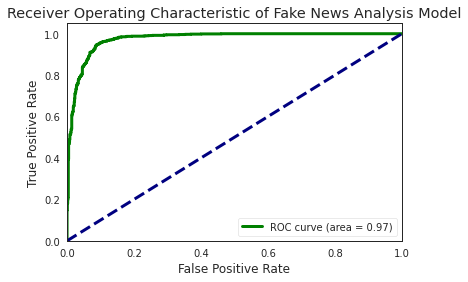

[[993  78]
 [ 89 920]]
              precision    recall  f1-score   support

        Fake       0.92      0.93      0.92      1071
        Real       0.92      0.91      0.92      1009

    accuracy                           0.92      2080
   macro avg       0.92      0.92      0.92      2080
weighted avg       0.92      0.92      0.92      2080



In [ ]:
#analyze the results
score, acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size=batch_size)
y_pred = model.predict(X_test)

#ROC AUC curve
rocAuc = roc_auc_score(Y_test, y_pred)

falsePositiveRate, truePositiveRate, _ = roc_curve(Y_test, y_pred)

plt.figure()

plt.plot(falsePositiveRate, truePositiveRate, color='green',
         lw=3, label='ROC curve (area = %0.2f)' % rocAuc)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of Fake News Analysis Model')
plt.legend(loc="lower right")
plt.show()


#Other accuracy metrices
y_pred = (y_pred > 0.5)

#confusion metrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

#F1 Score, Recall and Precision
print(classification_report(Y_test, y_pred, target_names=['Fake', 'Real']))

Bi-directional LSTM with word2vec

In [ ]:
from tensorflow.keras.layers import Bidirectional
model1=Sequential()
model1.add(embedding_layer)
model1.add(Bidirectional(LSTM(100)))
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 40, 300)           15000000  
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               320800    
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 201       
Total params: 15,321,001
Trainable params: 15,321,001
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size= 0.1, random_state = 24)

In [ ]:
#fit model
batch_size = 32
model1.fit(X_train, Y_train, epochs=10, verbose=1, batch_size=batch_size)

Epoch 1/10
585/585 [==============================] - 86s 144ms/step - loss: 0.1019 - accuracy: 0.9588
Epoch 2/10
585/585 [==============================] - 84s 144ms/step - loss: 0.0030 - accuracy: 0.9993
Epoch 3/10
585/585 [==============================] - 84s 144ms/step - loss: 0.0018 - accuracy: 0.9997
Epoch 4/10
585/585 [==============================] - 84s 144ms/step - loss: 0.0012 - accuracy: 0.9997
Epoch 5/10
585/585 [==============================] - 84s 144ms/step - loss: 3.2407e-04 - accuracy: 1.0000
Epoch 6/10
585/585 [==============================] - 84s 143ms/step - loss: 2.2167e-04 - accuracy: 1.0000
Epoch 7/10
585/585 [==============================] - 84s 144ms/step - loss: 3.5843e-05 - accuracy: 1.0000
Epoch 8/10
585/585 [==============================] - 84s 144ms/step - loss: 2.0117e-05 - accuracy: 1.0000
Epoch 9/10
585/585 [==============================] - 84s 144ms/step - loss: 1.6751e-05 - accuracy: 1.0000
Epoch 10/10
585/585 [==============================] 

65/65 - 1s - loss: 0.6483 - accuracy: 0.9216


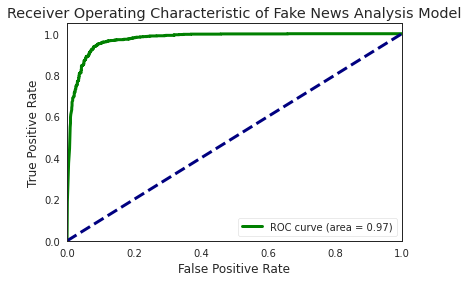

[[999  72]
 [ 91 918]]
              precision    recall  f1-score   support

        Fake       0.92      0.93      0.92      1071
        Real       0.93      0.91      0.92      1009

    accuracy                           0.92      2080
   macro avg       0.92      0.92      0.92      2080
weighted avg       0.92      0.92      0.92      2080



In [ ]:
#analyze the results
score, acc = model1.evaluate(X_test, Y_test, verbose = 2, batch_size=batch_size)
y_pred1 = model1.predict(X_test)

#ROC AUC curve
rocAuc = roc_auc_score(Y_test, y_pred1)

falsePositiveRate, truePositiveRate, _ = roc_curve(Y_test, y_pred1)

plt.figure()

plt.plot(falsePositiveRate, truePositiveRate, color='green',
         lw=3, label='ROC curve (area = %0.2f)' % rocAuc)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of Fake News Analysis Model')
plt.legend(loc="lower right")
plt.show()


#Other accuracy metrices
y_pred1 = (y_pred1 > 0.5)

#confusion metrix
cm1 = confusion_matrix(Y_test, y_pred1)
print(cm1)

#F1 Score, Recall and Precision
print(classification_report(Y_test, y_pred1, target_names=['Fake', 'Real']))

CNN with Word2Vec

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, Flatten, Dense, MaxPooling1D
import tensorflow as tf
import keras
# define model
vocab_size=5000
model3 = Sequential()
model3.add(embedding_layer)
model3.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model3.add(MaxPooling1D(pool_size=2))
model3.add(Flatten())
model3.add(Dense(1, activation='sigmoid'))
print(model3.summary())

# compile network
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 40, 300)           15000000  
_________________________________________________________________
conv1d (Conv1D)              (None, 36, 128)           192128    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 18, 128)           0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 2305      
Total params: 15,194,433
Trainable params: 15,194,433
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#fit model
batch_size = 32
model3.fit(X_train, Y_train, epochs=10, verbose=1, batch_size=batch_size)

Epoch 1/10
585/585 [==============================] - 84s 141ms/step - loss: 0.0847 - accuracy: 0.9739
Epoch 2/10
585/585 [==============================] - 82s 141ms/step - loss: 6.4436e-04 - accuracy: 1.0000
Epoch 3/10
585/585 [==============================] - 82s 141ms/step - loss: 1.1209e-04 - accuracy: 1.0000
Epoch 4/10
585/585 [==============================] - 82s 140ms/step - loss: 4.6884e-05 - accuracy: 1.0000
Epoch 5/10
585/585 [==============================] - 82s 141ms/step - loss: 2.6885e-05 - accuracy: 1.0000
Epoch 6/10
585/585 [==============================] - 82s 140ms/step - loss: 1.8389e-05 - accuracy: 1.0000
Epoch 7/10
585/585 [==============================] - 82s 140ms/step - loss: 1.3089e-05 - accuracy: 1.0000
Epoch 8/10
585/585 [==============================] - 82s 140ms/step - loss: 8.3609e-06 - accuracy: 1.0000
Epoch 9/10
585/585 [==============================] - 82s 141ms/step - loss: 6.2603e-06 - accuracy: 1.0000
Epoch 10/10
585/585 [====================

In [ ]:
#analyze the results
score, acc = model3.evaluate(X_test, Y_test, verbose = 2, batch_size=batch_size)
y_pred3 = model3.predict(X_test)

#ROC AUC curve
rocAuc = roc_auc_score(Y_test, y_pred3)

falsePositiveRate, truePositiveRate, _ = roc_curve(Y_test, y_pred3)

plt.figure()

plt.plot(falsePositiveRate, truePositiveRate, color='green',
         lw=3, label='ROC curve (area = %0.2f)' % rocAuc)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of Fake News Analysis Model')
plt.legend(loc="lower right")
plt.show()


#Other accuracy metrices
y_pred3 = (y_pred3 > 0.5)

#confusion metrix
cm3 = confusion_matrix(Y_test, y_pred3)
print(cm3)

#F1 Score, Recall and Precision
print(classification_report(Y_test, y_pred3, target_names=['Fake', 'Real']))

LSTM-CNN with word2vec

In [ ]:
modelh = Sequential()
modelh.add(embedding_layer)
modelh.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
modelh.add(MaxPooling1D(pool_size=2))
modelh.add(LSTM(100))
modelh.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs

modelh.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(modelh.summary())

In [ ]:
#fit model
batch_size = 32
modelh.fit(X_train, Y_train, epochs=10, verbose=1, batch_size=batch_size)

Epoch 1/10
585/585 [==============================] - 84s 141ms/step - loss: 0.0608 - accuracy: 0.9739
Epoch 2/10
585/585 [==============================] - 83s 141ms/step - loss: 0.0020 - accuracy: 0.9994
Epoch 3/10
585/585 [==============================] - 82s 141ms/step - loss: 6.1596e-05 - accuracy: 1.0000
Epoch 4/10
585/585 [==============================] - 83s 141ms/step - loss: 2.5370e-05 - accuracy: 1.0000
Epoch 5/10
585/585 [==============================] - 83s 141ms/step - loss: 1.4903e-05 - accuracy: 1.0000
Epoch 6/10
585/585 [==============================] - 82s 141ms/step - loss: 1.0400e-05 - accuracy: 1.0000
Epoch 7/10
585/585 [==============================] - 83s 141ms/step - loss: 7.0606e-06 - accuracy: 1.0000
Epoch 8/10
585/585 [==============================] - 83s 141ms/step - loss: 5.4954e-06 - accuracy: 1.0000
Epoch 9/10
585/585 [==============================] - 83s 141ms/step - loss: 3.8905e-06 - accuracy: 1.0000
Epoch 10/10
585/585 [========================

In [ ]:
#analyze the results
score, acc = modelh.evaluate(X_test, Y_test, verbose = 2, batch_size=batch_size)
y_predh = modelh.predict(X_test)

#ROC AUC curve
rocAuc = roc_auc_score(Y_test, y_predh)

falsePositiveRate, truePositiveRate, _ = roc_curve(Y_test, y_predh)

plt.figure()

plt.plot(falsePositiveRate, truePositiveRate, color='green',
         lw=3, label='ROC curve (area = %0.2f)' % rocAuc)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of Fake News Analysis Model')
plt.legend(loc="lower right")
plt.show()


#Other accuracy metrices
y_predh = (y_predh > 0.5)

#confusion metrix
cmh = confusion_matrix(Y_test, y_predh)
print(cmh)

#F1 Score, Recall and Precision
print(classification_report(Y_test, y_predh, target_names=['Fake', 'Real']))

Bidirectional LSTM -CNN with word2vec

In [ ]:
modelh1 = Sequential()
modelh1.add(embedding_layer)
modelh1.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
modelh1.add(MaxPooling1D(pool_size=2))
modelh1.add(Bidirectional(LSTM(100)))
modelh1.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs

modelh1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(modelh1.summary())

In [ ]:
#fit model
batch_size = 32
modelh1.fit(X_train, Y_train, epochs=10, verbose=1, batch_size=batch_size)

65/65 - 1s - loss: 0.6771 - accuracy: 0.9159


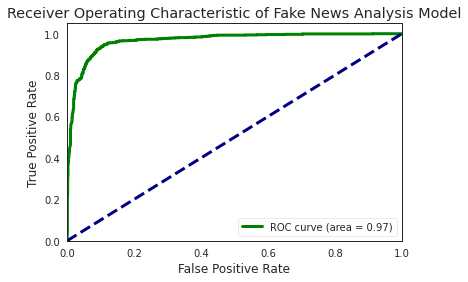

[[975  96]
 [ 79 930]]
              precision    recall  f1-score   support

        Fake       0.93      0.91      0.92      1071
        Real       0.91      0.92      0.91      1009

    accuracy                           0.92      2080
   macro avg       0.92      0.92      0.92      2080
weighted avg       0.92      0.92      0.92      2080



In [ ]:
#analyze the results
score, acc = modelh1.evaluate(X_test, Y_test, verbose = 2, batch_size=batch_size)
y_predh1 = modelh1.predict(X_test)

#ROC AUC curve
rocAuc = roc_auc_score(Y_test, y_predh1)

falsePositiveRate, truePositiveRate, _ = roc_curve(Y_test, y_predh1)

plt.figure()

plt.plot(falsePositiveRate, truePositiveRate, color='green',
         lw=3, label='ROC curve (area = %0.2f)' % rocAuc)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of Fake News Analysis Model')
plt.legend(loc="lower right")
plt.show()


#Other accuracy metrices
y_predh1 = (y_predh1 > 0.5)

#confusion metrix
cmh1 = confusion_matrix(Y_test, y_predh1)
print(cmh1)

#F1 Score, Recall and Precision
print(classification_report(Y_test, y_predh1, target_names=['Fake', 'Real']))

Basic LSTM With pre-trained Glove embeddings

GloVe is another kind of word vector representaiton proposed by Pennington et al. (2014) from the Stanford NLP Group.

https://nlp.stanford.edu/pubs/glove.pdf
The difference between Word2Vec and Glove is how the models compute the word vectors. In Word2Vec, the word vectors can be seen as a by-product of shallow neural network, when it tries to predict either centre word given surrounding words or vice versa.

GloVe word vectors are the object matrix of GloVe model which is calculated by using co-occurrence matrix and dimensionality reduction.

Now we will extract the Word vectors from pre-trained GloVe.

In [ ]:
y=np.array(y)

In [ ]:
vocab_size = 5000
maxlen = 100
batch_size = 64
epochs = 10
embedding_type = 'glove_embed_tokenizer'

seed = 21
np.random.seed(seed)

In [ ]:
%time

# Splitting data into train, test & validation sets
x_train, x_val_test, y_train, y_val_test = train_test_split(
    corpus, y, test_size=.4, stratify=y, random_state=seed)

x_val, x_test, y_val, y_test = train_test_split(
    x_val_test, y_val_test, test_size=.6, stratify=y_val_test, random_state=seed)

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2021-03-29 13:59:00--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-03-29 13:59:00--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-03-29 13:59:01--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.2’

glove

In [ ]:
!unzip glove*.zip

In [ ]:
!ls
!pwd

In [ ]:
# Create the tokenizer & fit on all the url texts

tokenizer = Tokenizer(num_words=vocab_size, lower=True)
tokenizer.fit_on_texts(x_train)


# Generating sequences & padding for efficient training of our neural network
# Transforms each text in texts to a sequence of integers.
from keras.preprocessing import sequence
train_sequences = tokenizer.texts_to_sequences(x_train)
train_padded_sequences = sequence.pad_sequences(train_sequences, maxlen=maxlen)

val_sequences = tokenizer.texts_to_sequences(x_val)
val_padded_sequences = sequence.pad_sequences(val_sequences, maxlen=maxlen)

test_sequences = tokenizer.texts_to_sequences(x_test)
test_padded_sequences = sequence.pad_sequences(test_sequences, maxlen=maxlen)

del x_train, train_sequences, x_val, val_sequences, x_test, test_sequences

In [ ]:

# Load Glove embeddings

print('Indexing word vectors.')

embeddings_index = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

# print('Loaded %s Glove word vectors.' % len(embeddings_index))
import pickle
pickle.dump({'embeddings_index' : embeddings_index } , open('drive', 'wb'))

# Create a weight matrix for all the words

print('\nMapping words to Glove embeddings ...')
embedding_matrix = np.zeros((vocab_size, maxlen))

for word, index in tokenizer.word_index.items():
    if index > vocab_size - 1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

print('Shape of Embedding Matrix: ', embedding_matrix.shape)
print('Glove Mapping done.')

In [ ]:
# Fixing the seed again
np.random.seed(seed)

print('\n\nBuild model ...')
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=maxlen,
                    weights=[embedding_matrix], trainable=False))
model.add(LSTM(maxlen, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

In [ ]:
train_padded_sequences.shape, y_train.shape,val_padded_sequences.shape, y_val.shape

In [ ]:
train_padded_sequences

array([[   0,    0,    0, ...,    1,    3,    2],
       [   0,    0,    0, ...,    0,  754,  792],
       [   0,    0,    0, ..., 4707,   66, 1197],
       ...,
       [   0,    0,    0, ...,  276,  412,    5],
       [   0,    0,    0, ...,    1,    3,    2],
       [   0,    0,    0, ...,  427,  257, 2347]], dtype=int32)

In [ ]:
# y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
# y_val = np.asarray(y_val).astype('float32').reshape((-1,1))

In [ ]:
y_train

In [ ]:
y_val

array([0, 1, 0, ..., 0, 1, 1])

In [ ]:
print('Training starts...')
model.fit(train_padded_sequences, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(val_padded_sequences, y_val),verbose=2)

Training starts...
Epoch 1/10
195/195 - 27s - loss: 0.2785 - accuracy: 0.8907 - val_loss: 0.2296 - val_accuracy: 0.9135
Epoch 2/10
195/195 - 25s - loss: 0.2082 - accuracy: 0.9179 - val_loss: 0.2044 - val_accuracy: 0.9147
Epoch 3/10
195/195 - 25s - loss: 0.1886 - accuracy: 0.9231 - val_loss: 0.1973 - val_accuracy: 0.9246
Epoch 4/10
195/195 - 25s - loss: 0.1732 - accuracy: 0.9293 - val_loss: 0.1966 - val_accuracy: 0.9225
Epoch 5/10
195/195 - 25s - loss: 0.1626 - accuracy: 0.9338 - val_loss: 0.1906 - val_accuracy: 0.9237
Epoch 6/10
195/195 - 25s - loss: 0.1510 - accuracy: 0.9403 - val_loss: 0.1878 - val_accuracy: 0.9267
Epoch 7/10
195/195 - 25s - loss: 0.1425 - accuracy: 0.9427 - val_loss: 0.1872 - val_accuracy: 0.9252
Epoch 8/10
195/195 - 25s - loss: 0.1287 - accuracy: 0.9490 - val_loss: 0.1824 - val_accuracy: 0.9297
Epoch 9/10
195/195 - 25s - loss: 0.1187 - accuracy: 0.9526 - val_loss: 0.1861 - val_accuracy: 0.9297
Epoch 10/10
195/195 - 25s - loss: 0.1075 - accuracy: 0.9579 - val_loss: 

In [ ]:
score, acc = model.evaluate(test_padded_sequences, y_test, verbose = 2, batch_size=batch_size)
y_pred = model.predict(test_padded_sequences)

In [ ]:
#ROC AUC curve
rocAuc = roc_auc_score(y_test, y_pred)

falsePositiveRate, truePositiveRate, _ = roc_curve(y_test, y_pred)

plt.figure()

plt.plot(falsePositiveRate, truePositiveRate, color='green',
         lw=3, label='ROC curve (area = %0.2f)' % rocAuc)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of Fake News Model')
plt.legend(loc="lower right")
plt.show()


#Other accuracy metrices
y_pred = (y_pred > 0.5)

#confusion metrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#F1 Score, Recall and Precision
print(classification_report(y_test, y_pred, target_names=['Fake', 'Real']))

## 10. Bidirectional-LSTM

Bidirectional LSTM With glove embedding

In [ ]:
# Fixing the seed again
np.random.seed(seed)

print('\n\nBuild model ...')
model1 = Sequential()
model1.add(Embedding(vocab_size, 100, input_length=maxlen,
                    weights=[embedding_matrix], trainable=False))
model1.add(Bidirectional(LSTM(maxlen, dropout=0.2, recurrent_dropout=0.2)))
model1.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs

model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model1.summary())

In [ ]:
print('Training starts...')
model1.fit(train_padded_sequences, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(val_padded_sequences, y_val),verbose=2)

In [ ]:
score, acc = model1.evaluate(test_padded_sequences, y_test, verbose = 2, batch_size=batch_size)
y_pred1 = model1.predict(test_padded_sequences)

In [ ]:
#ROC AUC curve
rocAuc = roc_auc_score(y_test, y_pred1)

falsePositiveRate, truePositiveRate, _ = roc_curve(y_test, y_pred1)

plt.figure()

plt.plot(falsePositiveRate, truePositiveRate, color='green',
         lw=3, label='ROC curve (area = %0.2f)' % rocAuc)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of Fake News Model')
plt.legend(loc="lower right")
plt.show()


#Other accuracy metrices
y_pred1 = (y_pred1 > 0.5)

#confusion metrix
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)

#F1 Score, Recall and Precision
print(classification_report(y_test, y_pred1, target_names=['Fake', 'Real']))

CNN with glove embedding

In [ ]:
# Fixing the seed again
np.random.seed(seed)

print('\n\nBuild model ...')
model4 = Sequential()
model4.add(Embedding(vocab_size, 100, input_length=maxlen,
                    weights=[embedding_matrix], trainable=False))
model4.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model4.add(MaxPooling1D(pool_size=2))
model4.add(Flatten())
model4.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs

model4.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model4.summary())

In [ ]:
print('Training starts...')
model4.fit(train_padded_sequences, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(val_padded_sequences, y_val),verbose=2)

Training starts...
Epoch 1/10
195/195 - 1s - loss: 0.2990 - accuracy: 0.8728 - val_loss: 0.2287 - val_accuracy: 0.9120
Epoch 2/10
195/195 - 1s - loss: 0.1837 - accuracy: 0.9261 - val_loss: 0.2105 - val_accuracy: 0.9177
Epoch 3/10
195/195 - 1s - loss: 0.1400 - accuracy: 0.9460 - val_loss: 0.2094 - val_accuracy: 0.9147
Epoch 4/10
195/195 - 1s - loss: 0.1076 - accuracy: 0.9611 - val_loss: 0.2155 - val_accuracy: 0.9207
Epoch 5/10
195/195 - 1s - loss: 0.0765 - accuracy: 0.9759 - val_loss: 0.2181 - val_accuracy: 0.9210
Epoch 6/10
195/195 - 1s - loss: 0.0510 - accuracy: 0.9873 - val_loss: 0.2309 - val_accuracy: 0.9093
Epoch 7/10
195/195 - 1s - loss: 0.0336 - accuracy: 0.9954 - val_loss: 0.2393 - val_accuracy: 0.9192
Epoch 8/10
195/195 - 1s - loss: 0.0217 - accuracy: 0.9979 - val_loss: 0.2608 - val_accuracy: 0.9201
Epoch 9/10
195/195 - 1s - loss: 0.0152 - accuracy: 0.9987 - val_loss: 0.2529 - val_accuracy: 0.9147
Epoch 10/10
195/195 - 1s - loss: 0.0107 - accuracy: 0.9994 - val_loss: 0.2695 - v

In [ ]:
score, acc = model4.evaluate(test_padded_sequences, y_test, verbose = 2, batch_size=batch_size)
y_pred4 = model4.predict(test_padded_sequences)

LSTM-CNN with glove embedding

In [ ]:
# Fixing the seed again
np.random.seed(seed)

print('\n\nBuild model ...')
model5 = Sequential()
model5.add(Embedding(vocab_size, 100, input_length=maxlen,
                    weights=[embedding_matrix], trainable=False))
model5.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model5.add(MaxPooling1D(pool_size=2))
model5.add(LSTM(100))
model5.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs

model5.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model5.summary())

In [ ]:
print('Training starts...')
model5.fit(train_padded_sequences, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(val_padded_sequences, y_val),verbose=2)

In [ ]:
score, acc = model5.evaluate(test_padded_sequences, y_test, verbose = 2, batch_size=batch_size)
y_pred5 = model5.predict(test_padded_sequences)

Bidirectional LSTM + CNN with glove embedding

In [ ]:
# Fixing the seed again
np.random.seed(seed)

print('\n\nBuild model ...')
model6 = Sequential()
model6.add(Embedding(vocab_size, 100, input_length=maxlen,
                    weights=[embedding_matrix], trainable=False))
model6.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model6.add(MaxPooling1D(pool_size=2))
model6.add(Bidirectional(LSTM(100)))
model6.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs

model6.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model6.summary())



Build model ...
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 100)          500000    
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 96, 128)           64128     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 48, 128)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 200)               183200    
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 201       
Total params: 747,529
Trainable params: 247,529
Non-trainable params: 500,000
_________________________________________________________________
None


In [ ]:
print('Training starts...')
model6.fit(train_padded_sequences, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(val_padded_sequences, y_val),verbose=2)

In [ ]:
score, acc = model6.evaluate(test_padded_sequences, y_test, verbose = 2, batch_size=batch_size)
y_pred6 = model6.predict(test_padded_sequences)

Bidirectional LSTM With one-hot encoding

In [ ]:
### Vocabulary size
voc_size=5000
#one  hot representation
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
#Panding
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

In [ ]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)
#splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [ ]:
## Creating model
from tensorflow.keras.layers import Bidirectional
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(100)))
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 200)               112800    
_________________________________________________________________
dropout_5 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 201       
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
### Training Bidirectional LSTM
model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

In [ ]:
#Performance Metrics And Accuracy
y_pred1=model1.predict_classes(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

With word2vec

# 11. CNN

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, Flatten, Dense, MaxPooling1D
import tensorflow as tf
import keras

With one hot encoding

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, Flatten, Dense, MaxPooling1D
import tensorflow as tf
import keras
# define model
vocab_size=5000
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=20))
model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

In [ ]:
# compile network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(X_train,y_train, epochs=10, verbose=2)

In [ ]:
#Performance Metrics And Accuracy
y_pred=model.predict_classes(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

With word2vec

## 12. CNN + LSTM

In [ ]:
# create the model
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=20))
model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
print(model.summary())

In [ ]:
#model training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

In [ ]:
y_pred=model.predict_classes(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

## 13. CNN+Bidirectional LSTM

In [ ]:
# create the model
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=20))
model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
print(model.summary())

In [ ]:
#model training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

In [ ]:
y_pred=model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

# Summary Report: Model Performance (Accuracy)

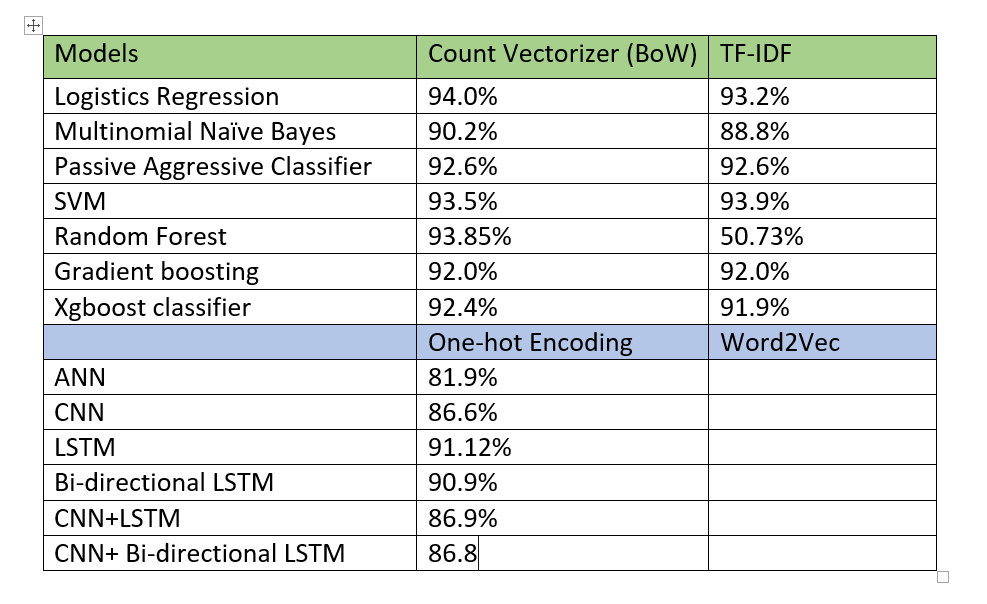

## Manual model testing

## Using the best performing model for testing

In [ ]:
# def output_lable(n):
#     if n == 0:
#         return "Fake News"
#     elif n == 1:
#         return "Not A Fake News"
    
# def manual_testing(news):
#     testing_news = {"text":[news]}
#     new_def_test = pd.DataFrame(testing_news)
#     new_def_test["text"] = new_def_test["text"].apply(wordopt) 
#     new_x_test = new_def_test["text"]
#     new_xv_test = vectorization.transform(new_x_test)
#     pred_LR1 = LR.predict(new_xv_test)
#     pred_DT = DT.predict(new_xv_test)
#     pred_GBC = GBC.predict(new_xv_test)
#     pred_RFC1 = RFC.predict(new_xv_test)

#     return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR1[0]), 
#                                                                                                               output_lable(predNB1_OUT[0]), 
#                                                                                                               output_lable(pred_GBC[0]), 
#                                                                                                               output_lable(pred_RFC1[0])))